In [2]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

In [3]:
# LOAD DATA
dataset = np.load('crystal_structures.npz')
features = np.array(dataset['xrd'], np.float32)  
labels = np.array(dataset['crystal_system'], int)  

In [4]:
# Filter Data
desired_labels = [0, 2, 3, 4]
mask = np.isin(labels, desired_labels)
features_filtered = features[mask]
labels_filtered = labels[mask]

# Normalisasi Feature
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features_filtered)

# Target Label Encoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels_filtered)

In [5]:
# Splitting Data: Train, Val, Split
X_train_val, X_test, y_train_val, y_test = train_test_split(features_scaled, labels_encoded, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=20)

# Reshape Data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [6]:
# Model
kernel = 3

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=kernel, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv1D(filters=64, kernel_size=kernel, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv1D(filters=64, kernel_size=kernel, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv1D(filters=128, kernel_size=kernel, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [7]:
# Hyperparameter
custom_learning_rate = 0.001
custom_optimizer = Adam(learning_rate=custom_learning_rate)
model.compile(loss='sparse_categorical_crossentropy', optimizer=custom_optimizer, metrics=['accuracy'])

# Histor
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30
105/105 [==============================] - 33s 262ms/step - loss: 1.0045 - accuracy: 0.6351 - val_loss: 2.7033 - val_accuracy: 0.1283
Epoch 2/30
105/105 [==============================] - 31s 295ms/step - loss: 0.6891 - accuracy: 0.7263 - val_loss: 5.1615 - val_accuracy: 0.1283
Epoch 3/30
105/105 [==============================] - 31s 300ms/step - loss: 0.5337 - accuracy: 0.7881 - val_loss: 5.3824 - val_accuracy: 0.1535
Epoch 4/30
105/105 [==============================] - 31s 292ms/step - loss: 0.4348 - accuracy: 0.8223 - val_loss: 8.8046 - val_accuracy: 0.1283
Epoch 5/30
105/105 [==============================] - 39s 375ms/step - loss: 0.3505 - accuracy: 0.8634 - val_loss: 5.0147 - val_accuracy: 0.1787
Epoch 6/30
105/105 [==============================] - 35s 333ms/step - loss: 0.3029 - accuracy: 0.8842 - val_loss: 1.2636 - val_accuracy: 0.5947
Epoch 7/30
105/105 [==============================] - 34s 328ms/step - loss: 0.2322 - accuracy: 0.9169 - val_loss: 1.2173 - val_ac

33/33 [==============================] - 1s 42ms/step - loss: 1.0056 - accuracy: 0.7965
Loss: 1.0056219100952148
Accuracy: 0.7965450882911682


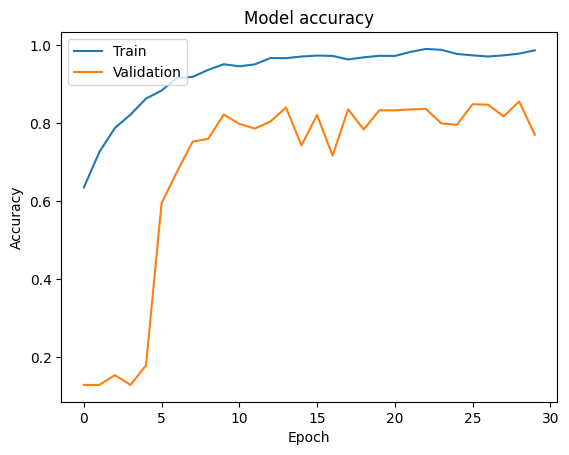

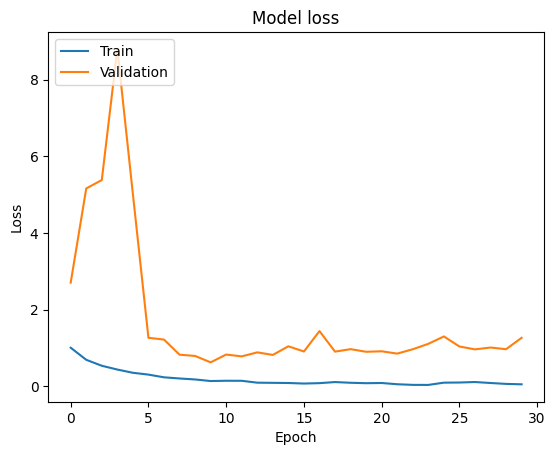

In [10]:
# Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
# Display some predictions
n_display = 5
indices = np.random.choice(X_test.shape[0], n_display)
predictions = model.predict(X_test[indices])
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))
true_labels = label_encoder.inverse_transform(y_test[indices])

for i in range(n_display):
    print(f"Predicted: {predicted_labels[i]}, True: {true_labels[i]}")

1/1 [==============================] - 1s 731ms/step
Predicted: 4, True: 4
Predicted: 3, True: 3
Predicted: 4, True: 4
Predicted: 3, True: 3
Predicted: 4, True: 4
